#Traffic Simulation

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
%matplotlib inline

In [65]:
import random

class Road:
   
    def __init__(self):
        self.road = 1000
    
    def __str__(self):
        return self.road

        
class Car:
    #defining the different attributes of a car
    def __init__(self, location, car_following=None):
        self.speed = 0
        self.min_distance = int(self.speed + 15)
        self.location = location
        self.car_following = car_following
        self.top_speed = 33
    
    def accelerate(self):
        if self.speed < self.top_speed:
            self.speed += 2
            return
        else:
            self.speed = self.car_following.speed
            return
    # a car has a 10% chance of slowing down
    def slow_down(self):
        random_slow = random.randint(1,10)
        if random_slow == 1:
            self.speed -= 2
            if self.speed < 0:
                self.speed = 0
    
    def simulation(self):
        if self.car_following.location > self.min_distance:
            self.accelerate()
            self.slow_down()
            self.location += self.speed
            if self.location >= road.road:
                self.location -= road.road
        #This function is starting the traffic simulation.
        #It is telling cars to speed up if there is too much distance between them.
        #Cars will also be randomly slowing down and if the cars go past 1000m then they will go to the beginnning.
        


road = Road()
car_list = []
location = 1000
car_in_front = None
car_locations = []
road_log = []
in_range = []
one_minute_log = []
cars_speed = []

# this is generating a list of 30 cars
for x in range(30):
    spawn_car = Car(location, car_in_front)
    car_list.append(spawn_car)
    car_list[0].car_following = car_list[-1]
    location -= 33
    car_in_front = spawn_car

# This is simulating the race for 1 minute(60 iterations)
for x in range(60):
    for car in car_list:
        car.simulation()
        [cars_speed.append(car.speed)]
        [car_locations.append(car.location)]
        [in_range.append(x)]
    [road_log.append(car_locations)]
    one_minute_log.append(in_range)

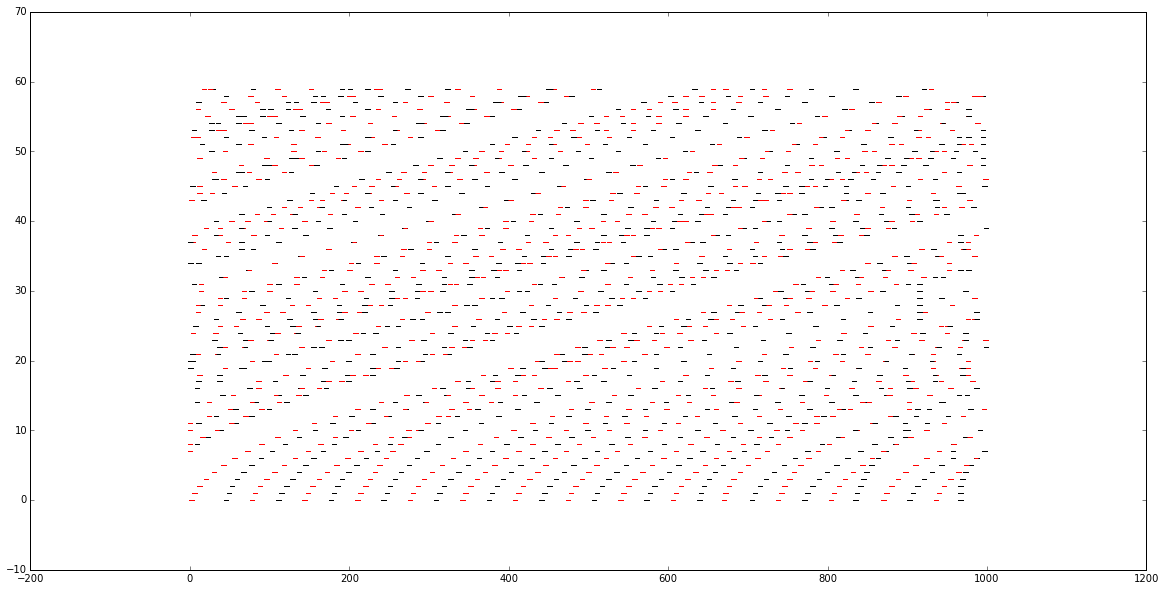

In [66]:
x = traffic_log
y = one_minute_log
plt.rcParams['figure.figsize'] = 20, 10
plt.scatter(x, y, marker = "_", c=['r','k'])
plt.show()

##Optimal Speed

In [67]:
average_speed = statistics.mean(cars_speed)
print("Average Speed: {}".format(average_speed))
var = []
for x in cars_speed:
    var.append((x - average_speed)**2)
var = statistics.mean(var)
print("Variance: {}".format(var))
stdv = var**(.5)
print("Standard Deviation: {}".format(stdv))
optimal_speed = average_speed + stdv

print("Optimal_speed: {}".format(optimal_speed))

Average Speed: 27.61777777777778
Variance: 81.66279506172839
Standard Deviation: 9.036746929162529
Optimal_speed: 36.65452470694031
